# Income prediction

In this homework, you are required to analyze and visualize a dataset describing a person's income. In this dataset,  **more than 30,000** real records are collected. The attributes of each record include age, education, occupation, race, sex and so on. Note that some information is missed and was recorded as NaN. Please follow the start code of this project and finish the rest.

Through this project, you are expected to have a better command of these fields:
- Exploratory Data Analysis
- Visualization

The attribute information is:

- **income**: the label of this dataset, belongs to \[high, low\] 
- **age**: the age of a person, a continuous variable.
- **work_class**: work class, belongs to \[Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked\].
- **education**: belongs to \[Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool\].
- **education_degree**: the education level of a person, an ordinal number variable.
- **marital_status**: marital status, belongs to \[Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse\]. 
- **job**: occupation, belongs to \[Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces\]. 
- **relationship**: belongs to \[Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried\].
- **race**: belongs to \[White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black\]. 
- **sex**: belongs to \[Female, Male\]. 
- **capital_gain**: capital gain, a continuous variable. 
- **capital_loss**: capital loss, a continuous variable. 
- **hours_per_week**: how long a person works every week, a continuous variable. 
- **birthplace**: belongs to \[United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, - Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands\].

Specifically, you are required to **fill the blanks of this notebook** based on your results. In this assignment, you will analyze how different features, models and hyper-parameters influence the performance.

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('income.csv')

## 2. Exploratory Data Analysis

### Take a brief look at the data using `head()`

In [3]:
df.head()

,age,work_class,education,education_degree,marital_status,job,relationship,race,sex,capital_gain,capital_loss,hours_per_week,birthplace,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,low
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,low
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,low
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,low
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,low


### Observe the basic statistical information of continuous attributes

In [4]:
df.describe() # only describe the continuous variables

,age,education_degree,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Count the NaN values

In [5]:
df.isnull().sum()  ### before

age                    0
work_class          1836
education              0
education_degree       0
marital_status         0
job                 1843
relationship           0
race                   0
sex                    0
capital_gain           0
capital_loss           0
hours_per_week         0
birthplace           583
income                 0
dtype: int64

### Remove NaN values due to small proportion to the whole dataset

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()  ### after

age                 0
work_class          0
education           0
education_degree    0
marital_status      0
job                 0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
birthplace          0
income              0
dtype: int64

### Pick out categorical and continuous variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
age                 30162 non-null int64
work_class          30162 non-null object
education           30162 non-null object
education_degree    30162 non-null int64
marital_status      30162 non-null object
job                 30162 non-null object
relationship        30162 non-null object
race                30162 non-null object
sex                 30162 non-null object
capital_gain        30162 non-null int64
capital_loss        30162 non-null int64
hours_per_week      30162 non-null int64
birthplace          30162 non-null object
income              30162 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### Observe categorical attributes

In [9]:
for col in df.select_dtypes([np.object]).columns:
    print('{}: {}\n'.format(col, df[col].unique()))

work_class: ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay']

education: ['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-voc' '1st-4th' '5th-6th' 'Assoc-acdm'
 '12th' '9th' 'Preschool']

marital_status: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

job: ['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Transport-moving' 'Sales' 'Craft-repair'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Handlers-cleaners'
 'Armed-Forces' 'Priv-house-serv']

relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

race: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

sex: ['Female' 'Male']

birthplace: ['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holan

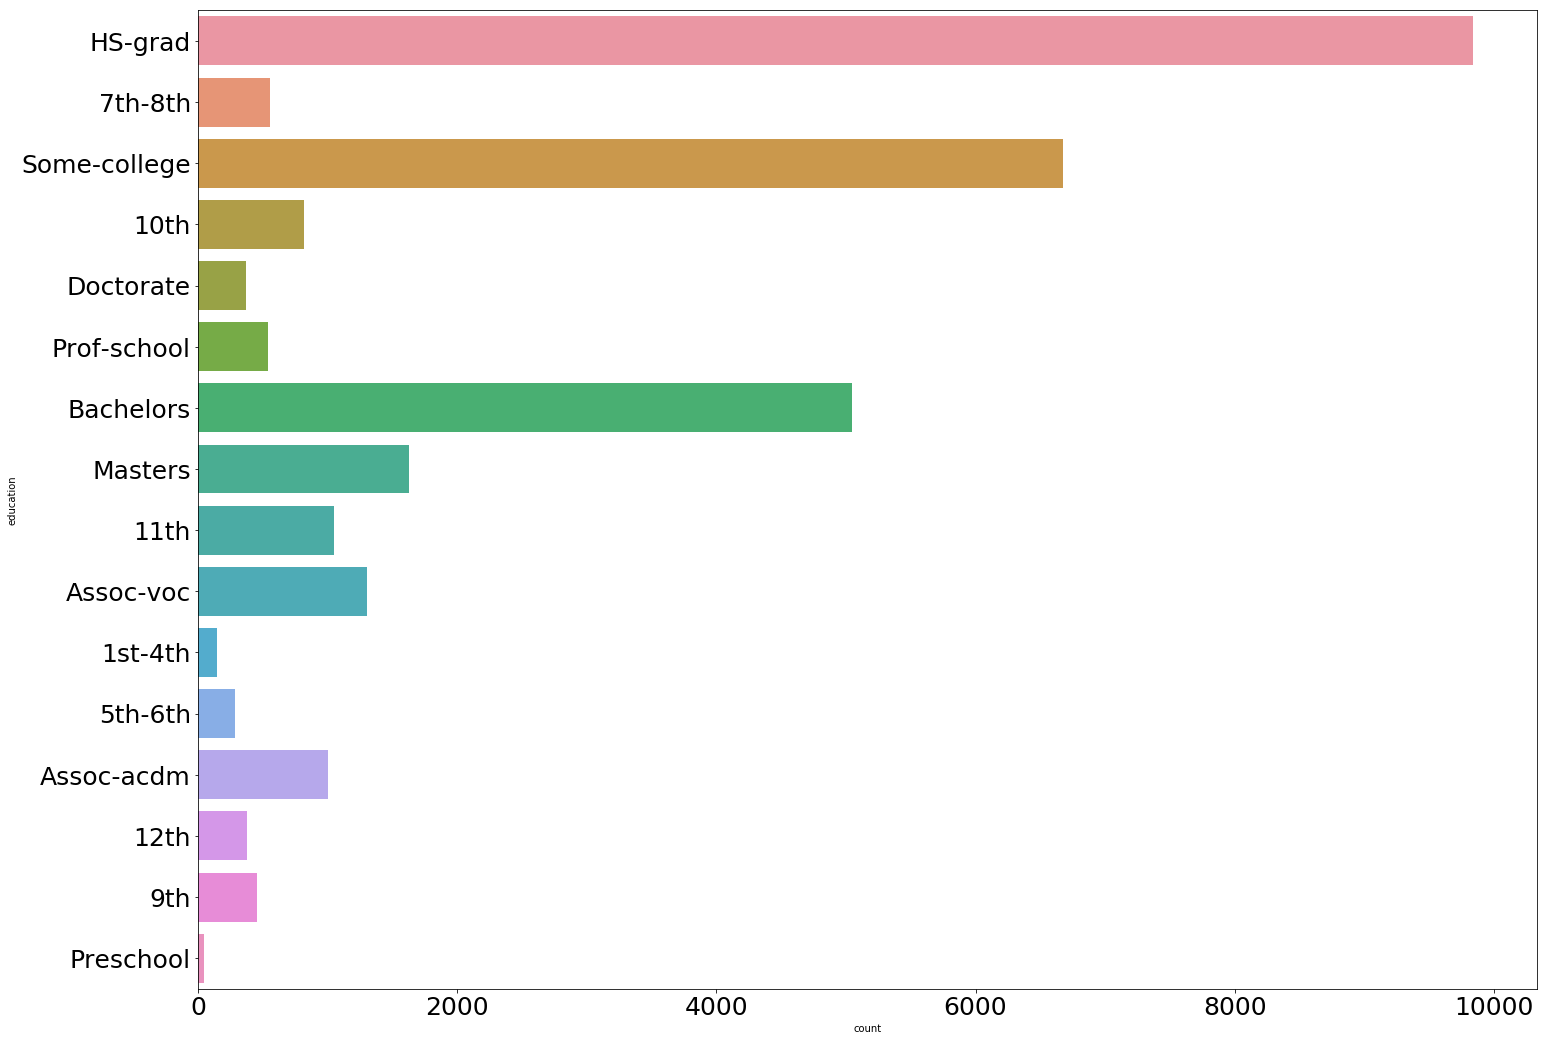

In [10]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(24,18))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
sns.countplot(y='education', data=df)

### Merge values of similar semantics

In [11]:
df.education.replace({
    'Preschool': 'dropout',
    '10th': 'dropout',
    '11th': 'dropout',
    '12th': 'dropout',
    '1st-4th': 'dropout',
    '5th-6th': 'dropout',
    '7th-8th': 'dropout',
    '9th': 'dropout',
    'HS-Grad': 'HighGrad',
    'HS-grad': 'HighGrad',
    'Some-colloge': 'CommunityCollege',
    'Assoc-acdm': 'CommunityCollege',
    'Assoc-voc': 'CommunityCollege',
    'Prof-school': 'Masters',
}, inplace=True)

### Univariable Analysis 

#### Using `seaborn.countplot()` to show categorical univariable

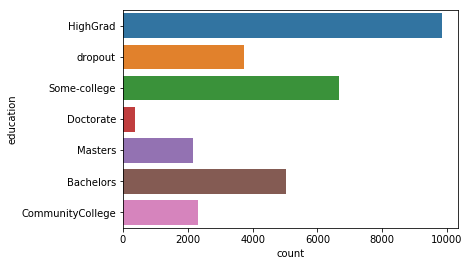

In [15]:
sns.countplot(y='education', data=df)
###Question 1. plot more categorical attributes including work_class and marital_status using countplot().
## 
## Your code here
## 


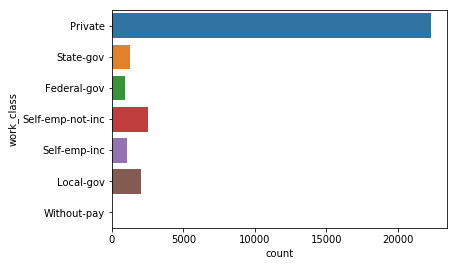

In [16]:
sns.countplot(y='work_class',data=df)

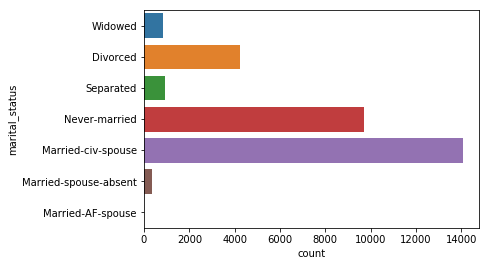

In [14]:
sns.countplot(y='marital_status',data=df)

#### Using built-in API `plot()` of DataFrame: bar chart to show categorical univariable

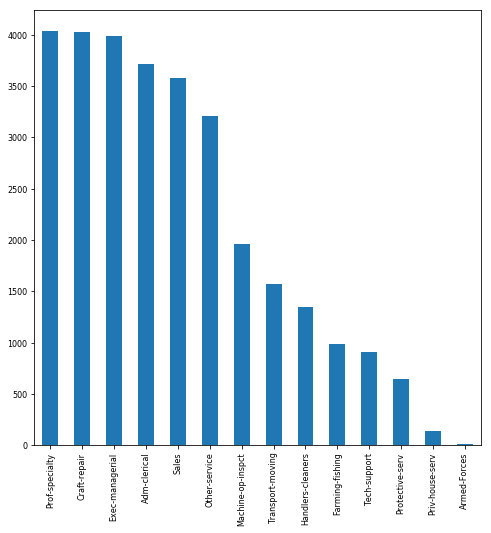

In [17]:
df.job.value_counts().plot(kind='bar', figsize=(8, 8), fontsize=8)
###Question 2. plot more categorical attributes including work_class and marital_status using bar chart.
## 
## Your code here
## 

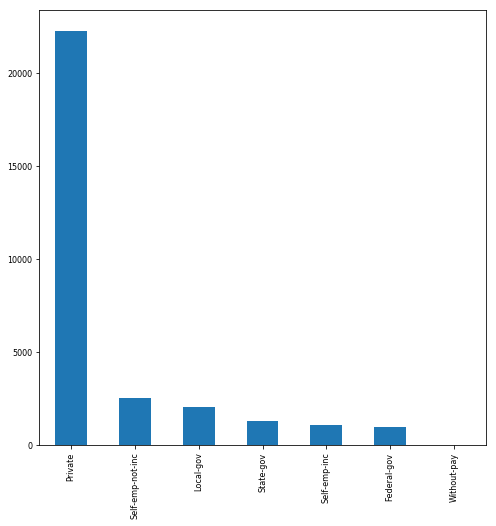

In [18]:
df.work_class.value_counts().plot(kind='bar', figsize=(8, 8), fontsize=8)

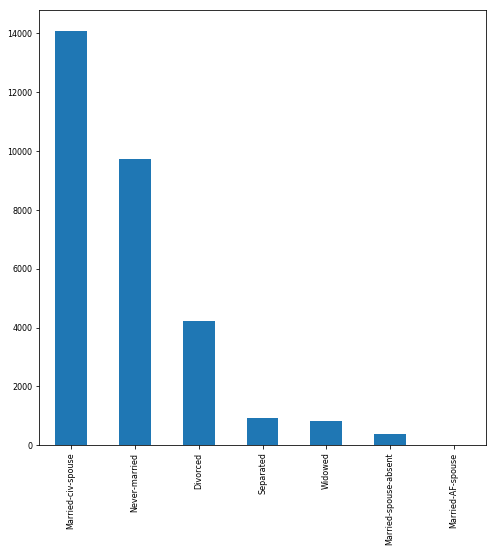

In [19]:
df.marital_status.value_counts().plot(kind='bar', figsize=(8, 8), fontsize=8)

#### Using built-in API `plot()` of DataFrame: pie chart  to show categorical univariable

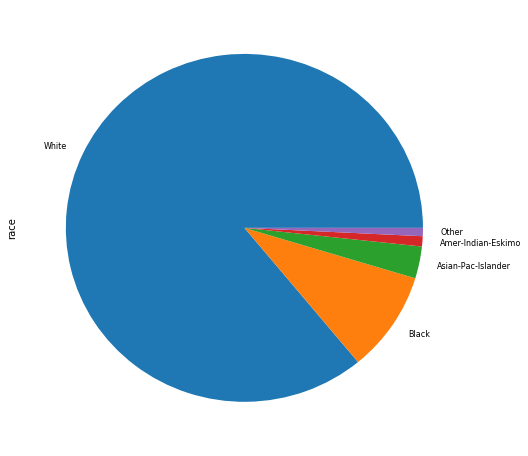

In [20]:
df.race.value_counts().plot(kind='pie', figsize=(8, 8), fontsize=8)
###Question 3. plot more categorical attributes including work_class and marital_status using pie chart.
## 
## Your code here
## 

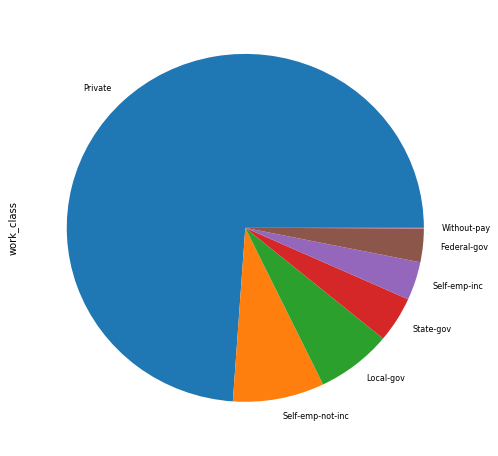

In [21]:
df.work_class.value_counts().plot(kind='pie', figsize=(8, 8), fontsize=8)

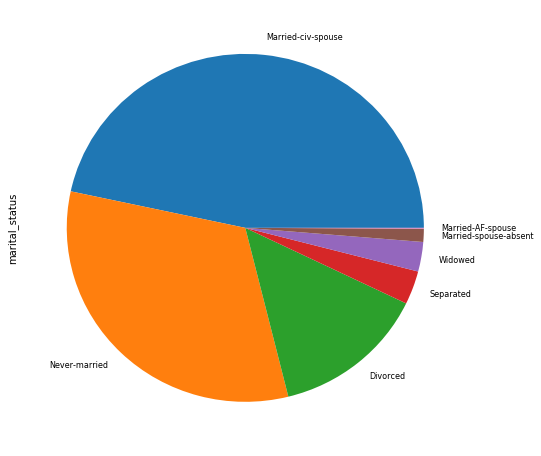

In [22]:
df.marital_status.value_counts().plot(kind='pie', figsize=(8, 8), fontsize=8)

#### Using `seaborn.distplot()` to show continuous univariable

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


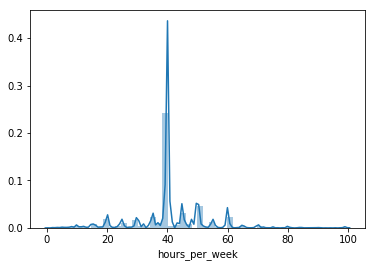

In [23]:
sns.distplot(df.hours_per_week)
###Question 4. plot more (at least 1) continuous attributes using distplot, such as capital_loss, hours_per_week, etc.
## 
## Your code here
## 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


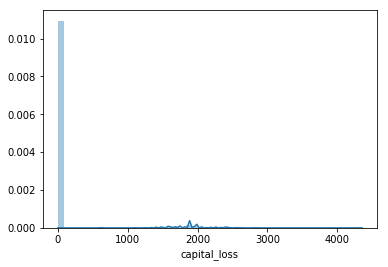

In [24]:
sns.distplot(df.capital_loss)

#### Using `plt.hist()` to show continuous univariable

(array([  511.,  1877.,  1995., 16582.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

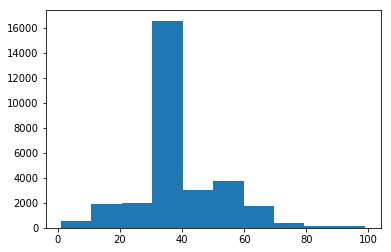

In [25]:
## Compare with seaborn.distplot()
plt.hist(df.hours_per_week)

#### Using `seaborn.boxplot()` to show continuous univariable

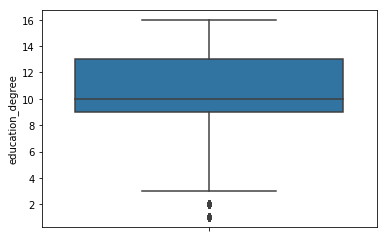

In [27]:
sns.boxplot(y=df.education_degree)
###Question 5. plot more (at least 1) continuous attributes using boxplot, such as capital_loss, hours_per_week, etc.
## 
## Your code here
## 

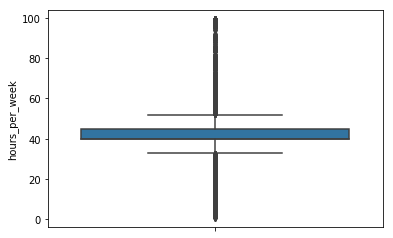

In [26]:
sns.boxplot(y=df.hours_per_week)

### Multivariable Analysis

#### Using `seaborn.distplot()` with different conditions to show continuous multivariable's relationship

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


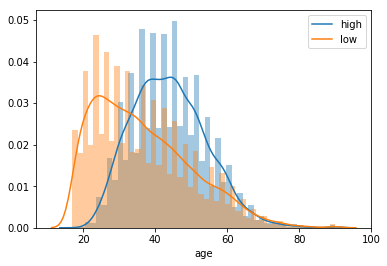

In [27]:
sns.distplot(df[df.income == 'high']['age'], kde_kws={'label': 'high'})
sns.distplot(df[df.income == 'low']['age'], kde_kws={'label': 'low'})
###Question 6. plot more (at least 1) attributes (conditioned on income) using distplot, such as capital_loss, hours_per_week, etc.
## 
## Your code here
## 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


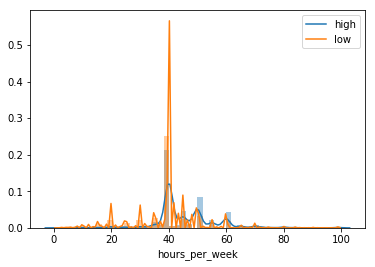

In [30]:
sns.distplot(df[df.income == 'high']['hours_per_week'], kde_kws={'label': 'high'})
sns.distplot(df[df.income == 'low']['hours_per_week'], kde_kws={'label': 'low'})

Using seaborn.boxplot() with different conditions to show continuous multivariable's relationship

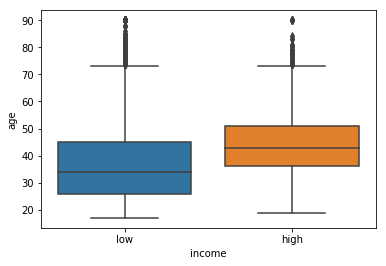

In [35]:
sns.boxplot(x="income", y="age", data=df)
###Question 7. plot more (at least 1) attributes (conditioned on income) using boxplot, such as capital_loss, hours_per_week, etc
## 
## Your code here
## 

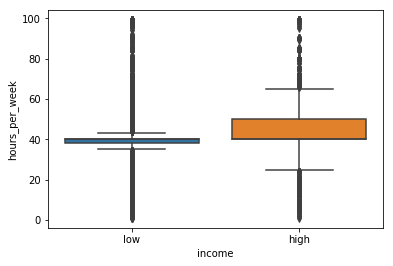

In [33]:
ax = sns.boxplot(x="income", y="hours_per_week", data=df)

Using seaborn.scatterplot() to show the relationship between different continuous multivariable

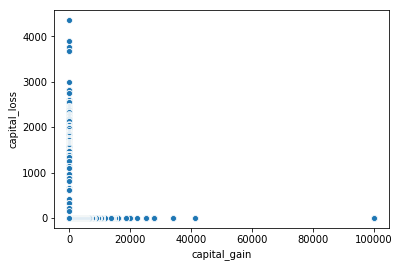

In [34]:
sns.scatterplot(x="capital_gain", y="capital_loss", data=df)

#### Using `seaborn.pairplot()` to reveal the relationships of different variables given the condition of `income` attributes

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


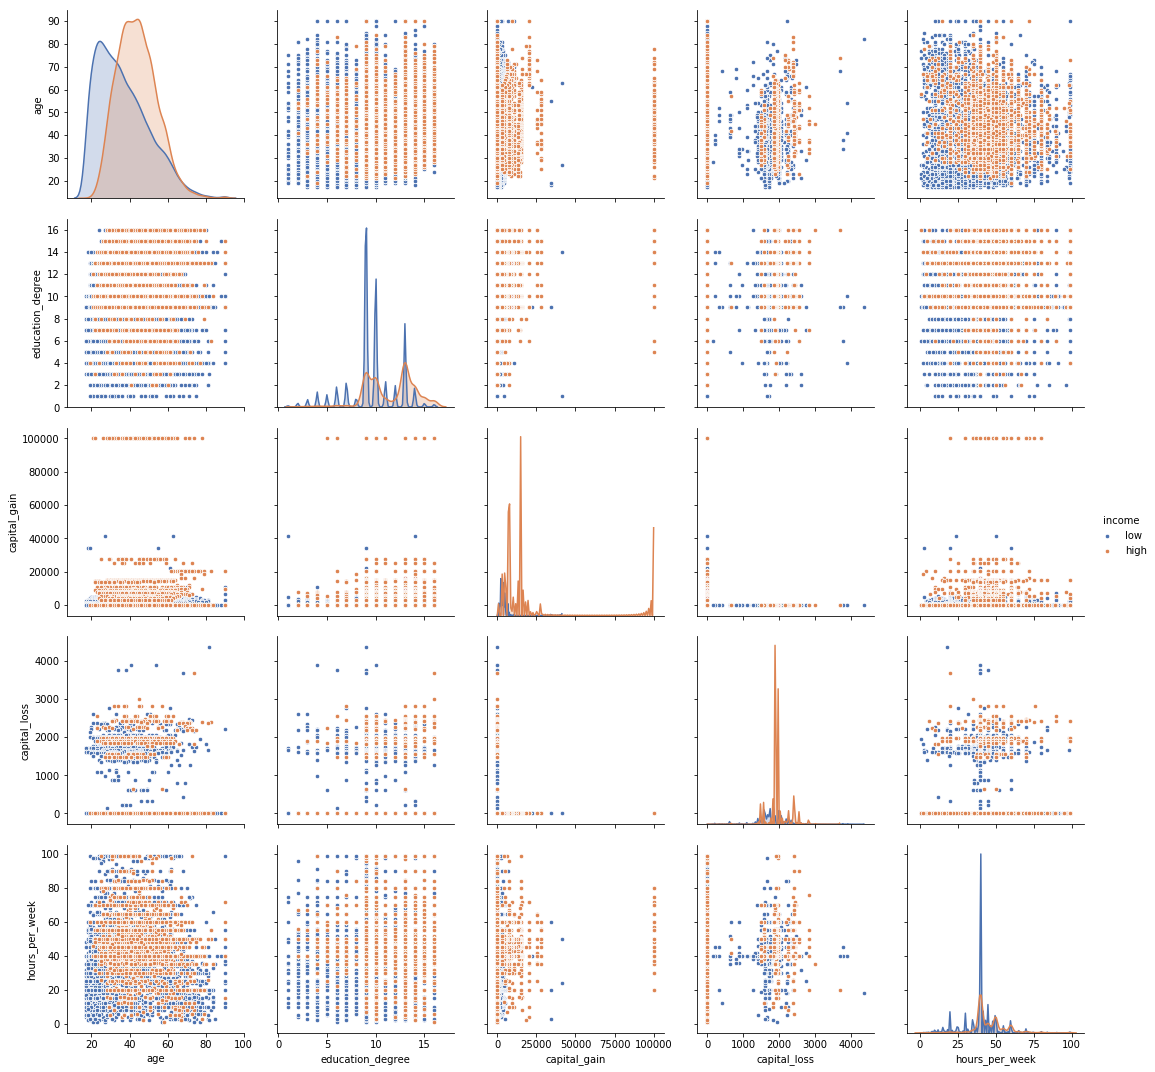

In [39]:
sns.pairplot(df, hue="income", palette='deep',
             size=3, diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=20))

#### Using `seaborn.heatmap()` to capture the correlation between different attributes

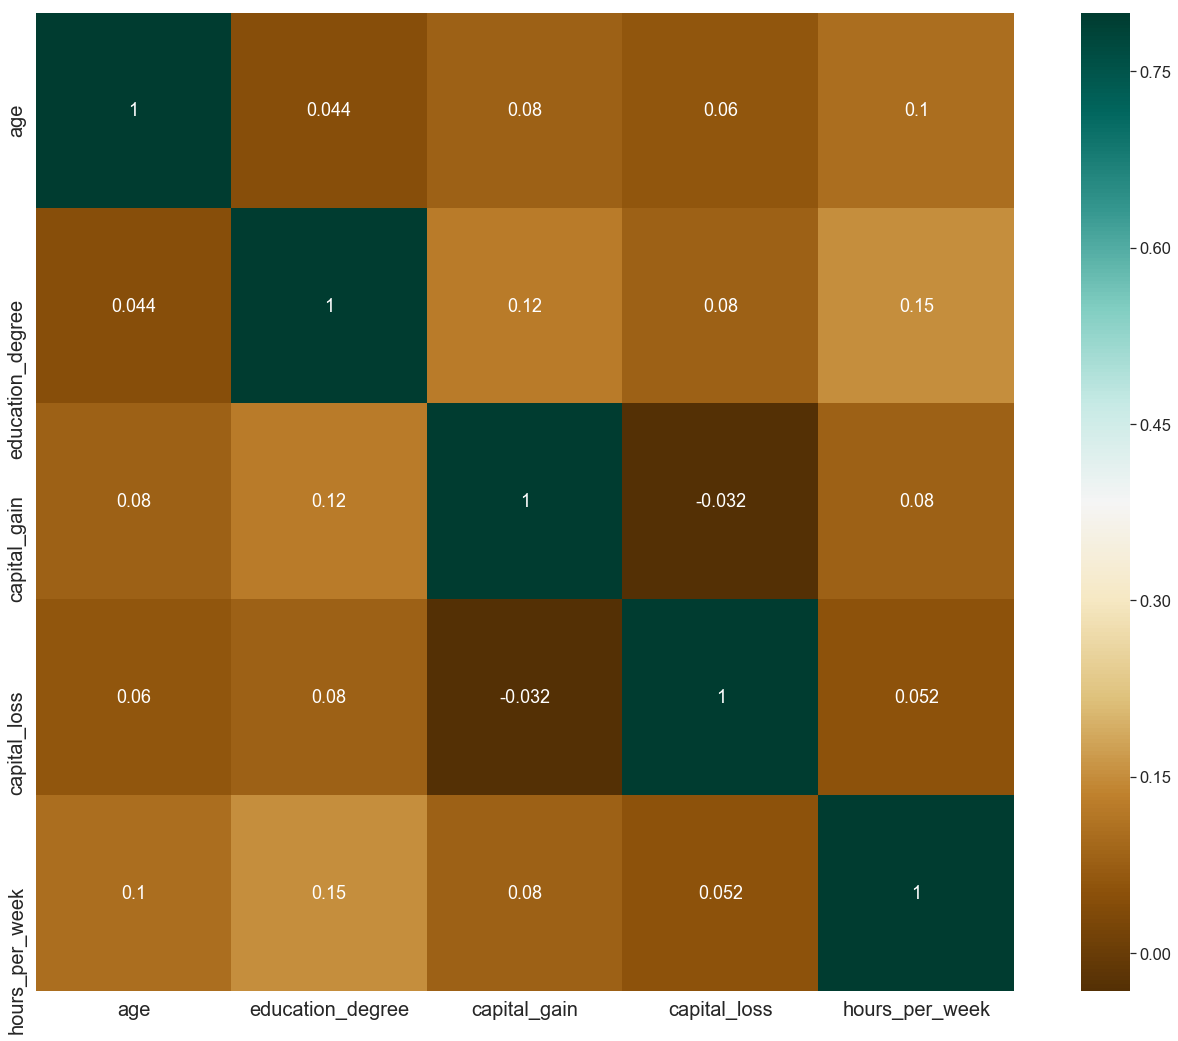

In [38]:
hmap = df.corr()
plt.subplots(figsize=(24, 18))
sns.set(font_scale=1.5)
ax = sns.heatmap(hmap, vmax=0.8, annot=True, cmap='BrBG', square=True)
ax.tick_params(labelsize=20) 

#### Using `seaborn.countplot()` with different conditions to show categorical multivariable's relationship

high_rate_in_private:  0.21879206676837476
high_rate_in_gov:  0.3072977384005596


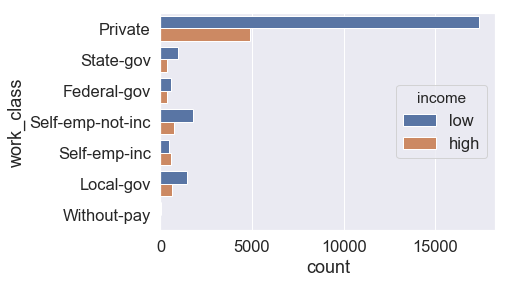

In [39]:
## Example: Citizens work in gov can earn more than those in private

## proof by plot
sns.countplot(y='work_class',hue = 'income',data=df)

## proof by calculation
private_df = df[df.work_class == 'Private']
gov_array = ['State-gov', 'Federal-gov', 'Local-gov']
gov_df = df[df.work_class.isin(gov_array)]
high_rate_in_private = private_df[private_df.income == 'high'].shape[0] / float(private_df.shape[0])
high_rate_in_gov = gov_df[gov_df.income == 'high'].shape[0] / float(gov_df.shape[0])
print('high_rate_in_private: ', high_rate_in_private)
print('high_rate_in_gov: ', high_rate_in_gov)

### Your Task

You are asked to inference the intrinsic correlations between different columns, e.g. `income` and `sex`.

Please proof whether the following assumptions are **True or Not** on our dataset? **Draw plots and calculate some values as the example to support your conclusion**.

1. Married citizens with spouse have higher chances of earning more than those who're unmarried/divorced/widowed/separated.
2. Males on an average earn more than females.
3. Higher Education can lead to higher income in most cases.

True

high_rate_in_married:  0.44548976203652463
high_rate_in_unmarried:  0.06799949064051955
True


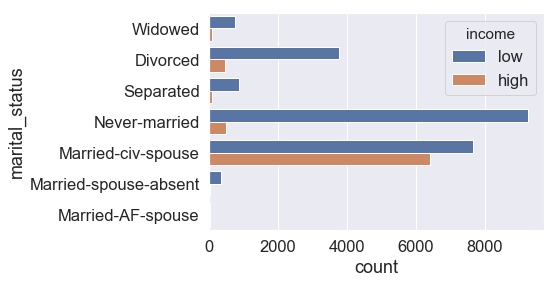

In [40]:
# Question 8: Married citizens with spouse have higher chances of earning more than those who're unmarried/divorced/widowed/separated.
## 
## Your code here
## 
print("True\n")
## proof by plot
sns.countplot(y='marital_status',hue = 'income',data=df)

## proof by calculation
married_array = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
married_df = df[df.marital_status.isin(married_array)]
unmarried_df = df[~df.marital_status.isin(married_array)]
high_rate_in_married = married_df[married_df.income == 'high'].shape[0] / float(married_df.shape[0])
high_rate_in_unmarried = unmarried_df[unmarried_df.income == 'high'].shape[0] / float(unmarried_df.shape[0])
print('high_rate_in_married: ', high_rate_in_married)
print('high_rate_in_unmarried: ', high_rate_in_unmarried)
if(high_rate_in_married > high_rate_in_unmarried):
    print("True")
else:
    print("False")

True

high_rate_in_Male:  0.3138370951913641
high_rate_in_Female:  0.11367818442036394
True


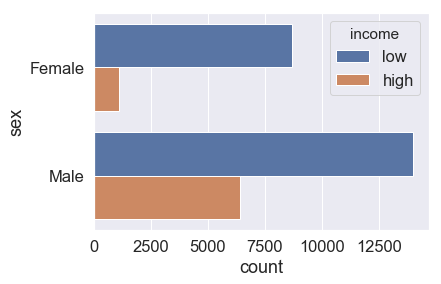

In [41]:
# Question 9: Males on an average make earn more than females.
## 
## Your code here
## 
print("True\n")
## proof by plot
sns.countplot(y='sex',hue = 'income',data=df)

## proof by calculation
Male_df = df[df.sex=='Male']
Female_df = df[df.sex=='Female']
high_rate_in_Male = Male_df[Male_df.income == 'high'].shape[0] / float(Male_df.shape[0])
high_rate_in_Female = Female_df[Female_df.income == 'high'].shape[0] / float(Female_df.shape[0])
print('high_rate_in_Male: ', high_rate_in_Male)
print('high_rate_in_Female: ', high_rate_in_Female)
if(high_rate_in_Male > high_rate_in_Female):
    print("True")
else:
    print("False")

True

high_rate_in_HighGrad:  0.16432926829268293
high_rate_in_dropout:  0.060144346431435444
high_rate_in_Some-college:  0.2000598981731057
high_rate_in_Doctorate:  0.7466666666666667
high_rate_in_Masters:  0.6104195481788843
high_rate_in_Bachelors:  0.42149088025376685
high_rate_in_CommunityCollege:  0.2591792656587473

We can see that high_income_rate: Doctorate > Masters > Bachelors > CommunityCollege > HighGrad > Dropout


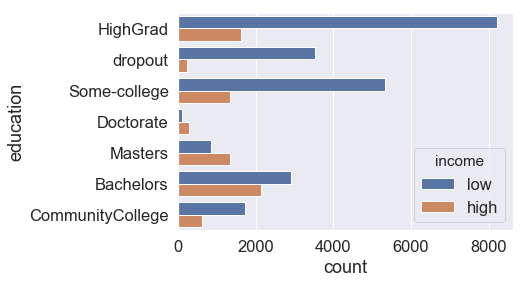

In [43]:
# Question 10: Higher Education can lead to higher income in most cases.
## Your code here
## 
print("True\n")
## proof by plot
sns.countplot(y='education',hue = 'income',data=df)

## proof by calculation
for edu in df['education'].unique():
    edu_df = df[df.education==edu]
    high_rate = edu_df[edu_df.income == 'high'].shape[0]/float(edu_df.shape[0])
    print('high_rate_in_'+edu+": ", high_rate)
    
print()
print("We can see that high_income_rate: Doctorate > Masters > Bachelors > CommunityCollege > HighGrad > Dropout")
